In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate,train_test_split
from sklearn import neighbors,preprocessing

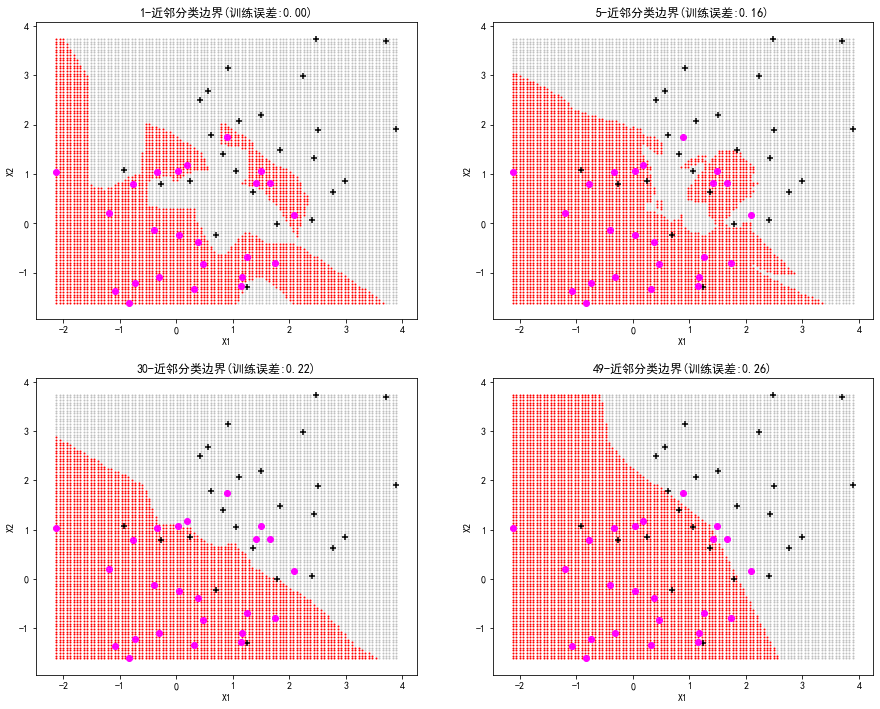

In [2]:
np.random.seed(123)
N=50
n=int(0.5*N)
X=np.random.normal(0,1,size=100).reshape(N,2)
Y=[0]*n+[1]*n
X[0:n]=X[0:n]+1.5
X1,X2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),100), np.linspace(X[:,1].min(),X[:,1].max(),100))
data=np.hstack((X1.reshape(10000,1),X2.reshape(10000,1)))

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,12))
for K,H,L in [(1,0,0),(5,0,1),(30,1,0),(49,1,1)]:
    modelKNN=neighbors.KNeighborsClassifier(n_neighbors=K)
    modelKNN.fit(X,Y)    
    Yhat=modelKNN.predict(data)    
    for k,c in [(0,'silver'),(1,'red')]:
        axes[H,L].scatter(data[Yhat==k,0],data[Yhat==k,1],color=c,marker='o',s=1)
    axes[H,L].scatter(X[:n,0],X[:n,1],color='black',marker='+')
    axes[H,L].scatter(X[(n+1):N,0],X[(n+1):N,1],color='magenta',marker='o')
    axes[H,L].set_title("%d-近邻分类边界(训练误差:%.2f)"%((K,1-modelKNN.score(X,Y))))
    axes[H,L].set_xlabel("X1")
    axes[H,L].set_ylabel("X2")

plt.show()

说明：仍沿用3.4.1节的模拟数据，观察K-近邻法参数K变化时的分类预测误差以及分类边界。
1、引用neighbors.KNeighborsClassifier包实现分类预测。KNeighborsClassifier默认计算的距离是闵可夫斯基距离，且不做加权处理。
2、代码中：for K,H,L in [(1,0,0),(5,0,1),(30,1,0),(49,1,1)]，采用循环方式（共4次）绘制四幅图形。其中，K,H,L分别代表K-近邻的参数K，图形的行坐标和列坐标。例如，第1次循环中K,H,L分别取值1，0，0，即采用1-近邻分类，且结果显示在第1行（索引号0）第1列（索引号0）的图形位置上。
3、为了是图形更为清晰，这里首先绘制分类边界，然后再在图中显示训练集的样本观测点。
4、图形表明：随着近邻个数K的增加，分类边界越来越趋于规则和平滑，模型复杂度由高到低，训练误差由小到大。